In [2]:
import pandas as pd
import numpy as np
import seaborn as sbs
import matplotlib.pyplot as plt
df=pd.read_csv("student-mat.csv",sep=',')
df.head()




,school,gender,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,health,absences,G1,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,3,6,5,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,3,4,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,3,10,7,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,5,2,15,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,5,4,6,10


In [3]:
dfs=df[['schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']]
dfs.head()


,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,yes,no,no,no,yes,yes,no,no
1,no,yes,no,no,no,yes,yes,no
2,yes,no,yes,no,yes,yes,yes,no
3,no,yes,yes,yes,yes,yes,yes,yes
4,no,yes,yes,no,yes,yes,no,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   gender      395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [6]:
dfs=dfs.replace('no', 0)
dfs=dfs.replace('yes',1)
dfs.head()

,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,1,0,0,0,1,1,0,0
1,0,1,0,0,0,1,1,0
2,1,0,1,0,1,1,1,0
3,0,1,1,1,1,1,1,1
4,0,1,1,0,1,1,0,0


In [7]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   schoolsup   395 non-null    int64
 1   famsup      395 non-null    int64
 2   paid        395 non-null    int64
 3   activities  395 non-null    int64
 4   nursery     395 non-null    int64
 5   higher      395 non-null    int64
 6   internet    395 non-null    int64
 7   romantic    395 non-null    int64
dtypes: int64(8)
memory usage: 24.8 KB


In [8]:
n=np.array(dfs[['schoolsup','famsup']])
n=n.reshape(-1,2)
n.shape


(395, 2)

In [9]:
m=np.array(dfs[['romantic','internet']])
m=m.reshape(-1,2)
m.shape


(395, 2)

In [11]:
from scipy.spatial import distance
dist_matrix = distance.cdist(n,m)
dist_matrix.shape

(395, 395)

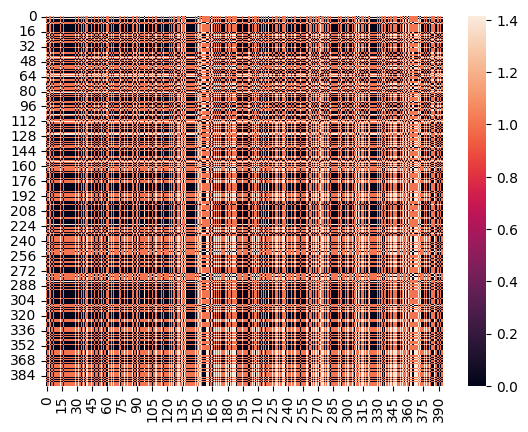

In [12]:
sbs.heatmap(dist_matrix)
plt.show()



In [13]:
# for binary attribute
dfs=df[['schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']]
dfs.head()


,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,yes,no,no,no,yes,yes,no,no
1,no,yes,no,no,no,yes,yes,no
2,yes,no,yes,no,yes,yes,yes,no
3,no,yes,yes,yes,yes,yes,yes,yes
4,no,yes,yes,no,yes,yes,no,no


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   gender      395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [15]:
# for numeric attribute
numeric=df[['age','Medu','Fedu','traveltime','studytime','failures']]
numeric.head()



,age,Medu,Fedu,traveltime,studytime,failures
0,18,4,4,2,2,0
1,17,1,1,1,2,0
2,15,1,1,1,2,3
3,15,4,2,1,3,0
4,16,3,3,1,2,0


In [16]:
 numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         395 non-null    int64
 1   Medu        395 non-null    int64
 2   Fedu        395 non-null    int64
 3   traveltime  395 non-null    int64
 4   studytime   395 non-null    int64
 5   failures    395 non-null    int64
dtypes: int64(6)
memory usage: 18.6 KB


In [17]:
num1=np.array(numeric[['age','failures']])
num1.reshape(-1,2)
num1.shape


(395, 2)

In [18]:
num2=np.array(numeric[['Fedu','Medu']])
num2.reshape(-1,2)
num2.shape


(395, 2)

In [20]:
from scipy.spatial import distance
dist_matrix = distance.cdist(num1,num2)
dist_matrix.shape

(395, 395)

<Axes: >

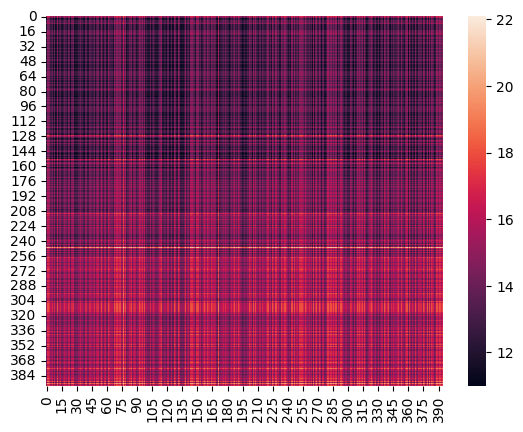

In [21]:
sbs.heatmap(dist_matrix)

In [23]:
nominal=df[['Mjob','Fjob','reason','guardian']]
nominal=nominal.replace('at_home','home')
nominal=(nominal.astype('category'))



In [24]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [25]:
 nominal['guardian']=lb.fit_transform(nominal['guardian'])

In [26]:
nominal['Mjob']=lb.fit_transform(nominal['Mjob'])

In [27]:
nominal['Fjob']=lb.fit_transform(nominal['Fjob'])

In [28]:
nominal['reason']=lb.fit_transform(nominal['reason'])
nominal.head()

,Mjob,Fjob,reason,guardian
0,1,4,0,1
1,1,2,0,0
2,1,2,2,1
3,0,3,1,1
4,2,2,1,0


In [29]:
nom1=np.array(nominal)
nom1.reshape(-1,2)

array([[1, 4],
       [0, 1],
       [1, 2],
       ...,
       [0, 1],
       [2, 1],
       [0, 0]])

In [30]:
nom2=np.array(nominal)
nom2.reshape(-1,2)

array([[1, 4],
       [0, 1],
       [1, 2],
       ...,
       [0, 1],
       [2, 1],
       [0, 0]])

(395, 395)

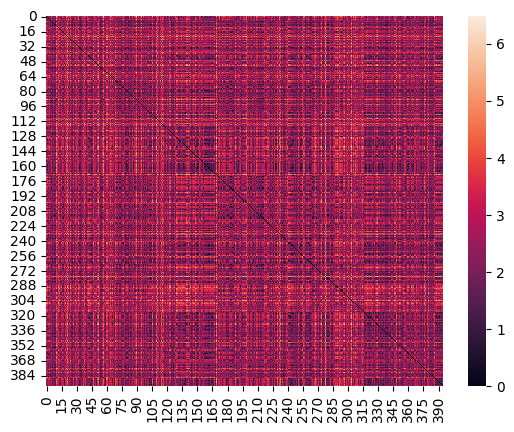

In [31]:
from scipy.spatial import distance
dist_matrix = distance.cdist(nom1,nom2)
sbs.heatmap(dist_matrix)
dist_matrix.shape

In [32]:
dist_matrix.shape


(395, 395)